In [4]:
# Load libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
# import alpaca_trade_api as tradeapi --> might not be needed


%matplotlib inline

# This is a new library not used previously in the class
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score


In [76]:
# end_date is yesterday, start_date is 5 years before end date
today = datetime.now()
end_delta = timedelta(days=1)
end_date = (today - end_delta).strftime('%Y-%m-%d')
start_delta = timedelta(days=1826)
start_date = ((today - end_delta) - start_delta).strftime('%Y-%m-%d')
print(end_date)
print(start_date)

2023-05-12
2018-05-12


In [77]:
# Get BTC-USD data and create dataframe
BTC = yf.Ticker("BTC-USD")
BTC_df = BTC.history(start = start_date, end = end_date)
BTC_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-05-12 00:00:00+00:00,8441.440430,8664.860352,8223.500000,8504.889648,6821380096,0.0,0.0
2018-05-13 00:00:00+00:00,8515.490234,8773.549805,8395.120117,8723.940430,5866379776,0.0,0.0
2018-05-14 00:00:00+00:00,8713.099609,8881.120117,8367.969727,8716.790039,7364149760,0.0,0.0
2018-05-15 00:00:00+00:00,8705.190430,8836.190430,8456.450195,8510.379883,6705710080,0.0,0.0
2018-05-16 00:00:00+00:00,8504.410156,8508.429688,8175.490234,8368.830078,6760220160,0.0,0.0


In [83]:
# Drop unwanted columns and cleanup data by dropping NAs and Duplicates
BTC_df.drop(columns = ["Dividends","Stock Splits"], inplace = True)
BTC_df.dropna(inplace = True)
BTC_df.drop_duplicates(inplace = True)
BTC_df.head()

KeyError: "['Dividends' 'Stock Splits'] not found in axis"

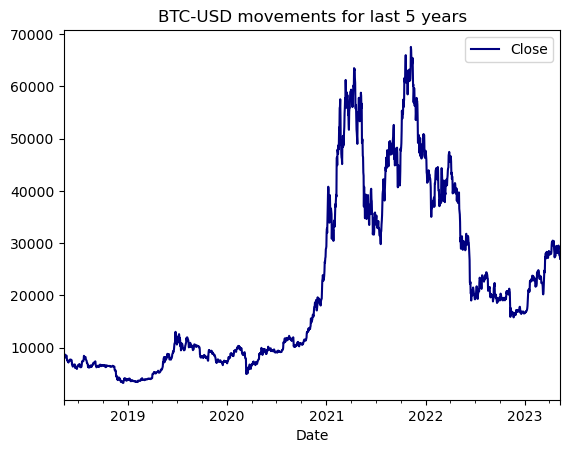

In [80]:
# Plot BTC close prices
BTC_df.plot.line(y = "Close", use_index=True, title = "BTC-USD movements for last 5 years", color = "navy");

In [81]:
# Get ETH-USD data and create dataframe
ETH = yf.Ticker("ETH-USD")
ETH_df = ETH.history(start = start_date, end = end_date)
ETH_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-05-12 00:00:00+00:00,679.877014,691.411011,644.065979,686.047974,2668480000,0.0,0.0
2018-05-13 00:00:00+00:00,687.174988,741.312012,675.318970,733.495972,2362500096,0.0,0.0
2018-05-14 00:00:00+00:00,732.732971,742.169983,695.791992,730.549011,3005110016,0.0,0.0
2018-05-15 00:00:00+00:00,731.143005,739.052002,700.994995,708.870972,2523069952,0.0,0.0
2018-05-16 00:00:00+00:00,708.086975,710.200012,682.541016,707.049988,2476130048,0.0,0.0


In [82]:
# Drop unwanted columns and cleanup data by dropping NAs and Duplicates
ETH_df.drop(columns = ["Dividends","Stock Splits"], inplace = True)
ETH_df.dropna(inplace = True)
ETH_df.drop_duplicates(inplace = True)
ETH_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-05-12 00:00:00+00:00,679.877014,691.411011,644.065979,686.047974,2668480000
2018-05-13 00:00:00+00:00,687.174988,741.312012,675.318970,733.495972,2362500096
2018-05-14 00:00:00+00:00,732.732971,742.169983,695.791992,730.549011,3005110016
2018-05-15 00:00:00+00:00,731.143005,739.052002,700.994995,708.870972,2523069952
2018-05-16 00:00:00+00:00,708.086975,710.200012,682.541016,707.049988,2476130048


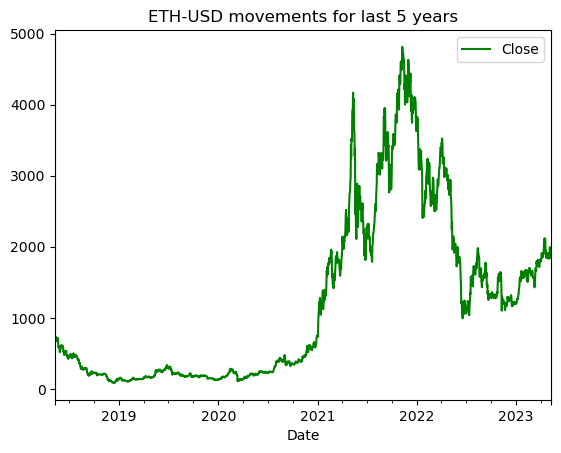

In [16]:
# Plot ETH close prices
ETH_df.plot.line(y = "Close", use_index=True, title = "ETH-USD movements for last 5 years", color = "green");

In [17]:
# Get LTC-USD data and create dataframe and convert index to date only
LTC = yf.Ticker("LTC-USD")
LTC_df = LTC.history(start = start_date, end = end_date)
LTC_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-05-11 00:00:00+00:00,149.445007,149.445007,134.725998,137.117004,530416000,0.0,0.0
2018-05-12 00:00:00+00:00,137.257004,144.419006,132.587997,141.882004,410184992,0.0,0.0
2018-05-13 00:00:00+00:00,141.798004,147.246002,137.654999,144.587997,383224000,0.0,0.0
2018-05-14 00:00:00+00:00,144.623993,152.154999,136.072006,147.714005,584222016,0.0,0.0
2018-05-15 00:00:00+00:00,147.488007,149.382996,138.570007,139.880005,415984992,0.0,0.0


In [18]:
# Drop unwanted columns and cleanup data by dropping NAs and Duplicates
LTC_df.drop(columns = ["Dividends","Stock Splits"], inplace = True)
LTC_df.dropna(inplace = True)
LTC_df.drop_duplicates(inplace = True)
LTC_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-05-11 00:00:00+00:00,149.445007,149.445007,134.725998,137.117004,530416000
2018-05-12 00:00:00+00:00,137.257004,144.419006,132.587997,141.882004,410184992
2018-05-13 00:00:00+00:00,141.798004,147.246002,137.654999,144.587997,383224000
2018-05-14 00:00:00+00:00,144.623993,152.154999,136.072006,147.714005,584222016
2018-05-15 00:00:00+00:00,147.488007,149.382996,138.570007,139.880005,415984992


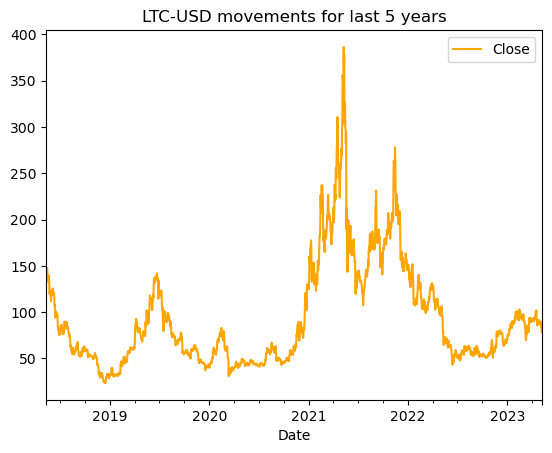

In [19]:
# Plot LTC close prices
LTC_df.plot.line(y = "Close", use_index=True, title = "LTC-USD movements for last 5 years", color = "orange");

In [20]:
# Combine dataframes and change the index to date only format
crypto_portfolio_df = pd.concat(
    [BTC_df,ETH_df,LTC_df],
    join = "inner",
    axis = 1,
    keys = ["BTC","ETH","LTC"]
)

crypto_portfolio_df.index = crypto_portfolio_df.index.date
crypto_portfolio_df.head()

BTC                                                     \
                   Open         High          Low        Close      Volume   
2018-05-11  9052.959961  9052.959961  8394.459961  8441.490234  8488520192   
2018-05-12  8441.440430  8664.860352  8223.500000  8504.889648  6821380096   
2018-05-13  8515.490234  8773.549805  8395.120117  8723.940430  5866379776   
2018-05-14  8713.099609  8881.120117  8367.969727  8716.790039  7364149760   
2018-05-15  8705.190430  8836.190430  8456.450195  8510.379883  6705710080   

                   ETH                                                  \
                  Open        High         Low       Close      Volume   
2018-05-11  727.013000  736.976990  669.825012  679.585999  3290080000   
2018-05-12  679.877014  691.411011  644.065979  686.047974  2668480000   
2018-05-13  687.174988  741.312012  675.318970  733.495972  2362500096   
2018-05-14  732.732971  742.169983  695.791992  730.549011  3005110016   
2018-05-15  731.143005  739.052002  700.994995  708.870972  2523069952   

                   LTC                                                 
                  Open        High         Low       Close     Volume  
2018-05-11  149.445007  149.445007  134.725998  137.117004  530416000  
2018-05-12  137.257004  144.419006  132.587997  141.882004  410184992  
2018-05-13  141.798004  147.246002  137.654999  144.587997  383224000  
2018-05-14  144.623993  152.154999  136.072006  147.714005  584222016  
2018-05-15  147.488007  149.382996  138.570007  139.880005  415984992

In [22]:
# Plot combined table data as a bar graph
crypto_portfolio_df.hvplot.bar.(
    x='', 
    y='',
    rot=,
    xlabel='', 
    ylabel=''
).opts(yformatter='%.0f', color = 'black')

SyntaxError: invalid syntax (3706454035.py, line 2)

In [23]:
# Define portfolio weighting
BTC_weight = 0.60
ETH_weight = 0.30
LTC_weight = 0.10

crypto_portfolio_weights = [BTC_weight, ETH_weight, LTC_weight]

# Define initial investment
initial_investment = 10000

In [24]:
# Make a new dataframe to make table readable for Random Forest Clacifier. The weightings are already defined. The resulting dataframe will be a sum of all the individual dataframes data multiplied by the defined weightings.

crypto_portfolio_RFC = BTC_weight * BTC_df + ETH_weight * ETH_df + LTC_weight * LTC_df

crypto_portfolio_RFC

,Open,High,Low,Close,Volume
Date,,,,,
2018-05-11 00:00:00+00:00,5664.824377,5667.813574,5251.096080,5282.481641,6.133178e+09
2018-05-12 00:00:00+00:00,5282.553062,5420.781415,5140.578593,5322.936382,4.934391e+09
2018-05-13 00:00:00+00:00,5329.626437,5501.248087,5253.433261,5468.871849,4.266900e+09
2018-05-14 00:00:00+00:00,5462.142056,5566.538565,5243.126634,5464.010127,5.378445e+09
2018-05-15 00:00:00+00:00,5457.205960,5538.368158,5298.025616,5332.877222,4.821946e+09
...,...,...,...,...,...
2023-05-06 00:00:00+00:00,18330.843345,18506.278304,17650.795473,17921.203513,1.249640e+10
2023-05-07 00:00:00+00:00,17919.311694,18083.179625,17635.077422,17643.267295,8.880573e+09
2023-05-08 00:00:00+00:00,17640.373746,17772.297647,16939.298575,17179.064223,1.451416e+10


### This section cover the Random Forest Clacifier our group has tried to use to determine future crypto prices - ALEX TO COMMENT CODE

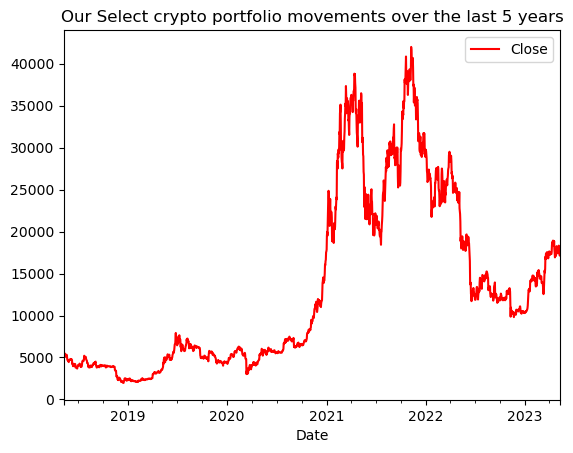

In [25]:
# Plot Cryto Portfolio of BTC, ETH and LTC

crypto_portfolio_RFC.plot.line(y = "Close", use_index=True, title = "Our Select crypto portfolio movements over the last 5 years", color = "red");

In [26]:
# Setting up the conditions for the Random Forest Clacifier.
# Identify Target as being whether or not Tomorrows value is greater than Todays close value. This Target is represented by a 1 or 0, 1 is the price has gone up and 0 is price has gone down. Unfortunatly it does not tell us by hw much the value has gone up or down
crypto_portfolio_RFC['Tomorrow'] = crypto_portfolio_RFC['Close'].shift(-1)
crypto_portfolio_RFC['Target'] = (crypto_portfolio_RFC['Tomorrow'] > crypto_portfolio_RFC['Close']).astype(int)

In [27]:
# Setting parmeters for our model to influence accuracy. i.e. n_estimators allows us to set number of estimates used in the model, min samples splits allows us to minimise overfitting. Worthwhile playing with these parameters to improve efficiency.Random state = 1 essentially means that if the model is run multiple times you should return similar reults.

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Setting the amount od data we are training the model on and then what we are testing on. Need to make sure this is different. In below first 100 rows are in Train set and last 100 rows are in test. Again this could be altered to improve accuracy.

train = crypto_portfolio_RFC.iloc[:-100]
test = crypto_portfolio_RFC.iloc[-100:]

# Set columns used to predict Target. Need to be sure you use correct columns.
# Train the model using the predictor columns.
predictors = ['Open', 'High', 'Low', 'Close', 'Volume']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [28]:
# Using predict method to pass in test scoes to make predictions.
# Predictions score is calculated. The score states that for every time the model predicted values went up it actually went up 'X' number of times. 

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test ['Target'], preds)

0.45614035087719296

In [29]:
# Provde a quick count of predicted 0 and 1's.

predictions["Predictions"].value_counts()

NameError: name 'predictions' is not defined

In [30]:
# Displaying crypto Portoflio DF.

crypto_portfolio_RFC.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2018-05-11 00:00:00+00:00,5664.824377,5667.813574,5251.096080,5282.481641,6.133178e+09,5322.936382,1
2018-05-12 00:00:00+00:00,5282.553062,5420.781415,5140.578593,5322.936382,4.934391e+09,5468.871849,1
2018-05-13 00:00:00+00:00,5329.626437,5501.248087,5253.433261,5468.871849,4.266900e+09,5464.010127,0
2018-05-14 00:00:00+00:00,5462.142056,5566.538565,5243.126634,5464.010127,5.378445e+09,5332.877222,0
2018-05-15 00:00:00+00:00,5457.205960,5538.368158,5298.025616,5332.877222,4.821946e+09,5247.339844,0


<AxesSubplot:xlabel='Date'>

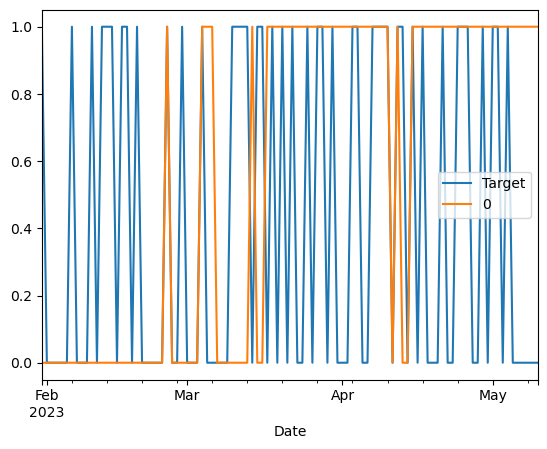

In [31]:
# Visually displaying the predicted value vs actual values. i.e. Actual 'Target' (blue) vs Predictions (orange). We mostly predicted value would go up and modtly it went down.

combined = pd.concat([test['Target'], preds], axis = 1)
combined.plot()

In [32]:
# Fitting model and predicting, combing predictions, returning combined df.

def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined



In [33]:
# Using backtest allows you to test against historical data multiple times. Start means we will intially test using the first 250 data points and then do this for an additional 25 times, therby generating multiple test runs and increasing our accuracy.
# Function will loop across our data to test multiple years.

def backtest(data, model, predictors, start = 250, step = 25):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        return pd.concat(all_predictions)

In [36]:
# Running the prediction, you can see that when we predicted market would go up it actually went up 'X" number of times
predictions = backtest(crypto_portfolio_RFC, model, predictors)
precision_score(predictions['Target'], predictions['Predictions'])

0.48

In [39]:
predictions["Predictions"].value_counts() 

1    25
Name: Predictions, dtype: int64

In [ ]:
# Now we will look to start Adding Predictors to improve accuracy
# Using Rolling Averages

In [58]:
# Horizonhs here are differnt days that we can compare todays value against past values at differnt periods in time i.e.  2, 5, 60 and 250 days ago. Comparing against past 'horizons' can help the model identify if the market is due for an upturn or downturn.

horizons = [2,5,60,250]
new_predictors = []

#Calculate a rolling average against the horizons.

for horizon in horizons:
    rolling_averages = crypto_portfolio_RFC.rolling(horizon).mean()

# closed prices in portfolio divided by rolling averages
    ratio_column = f"Close_Ratio_{horizon}"
    crypto_portfolio_RFC[ratio_column] = crypto_portfolio_RFC['Close'] / rolling_averages['Close']
    
# Trend is number of days in past x days that stock price went up  
# Shift forward will be used to determine rolling sum, model will look at last few days and find sum of the 'Target'.

    trend_column = f"Trend_{horizon}"
    crypto_portfolio_RFC[trend_column] = crypto_portfolio_RFC.shift(1).rolling(horizon).sum()["Target"] 

 # Add ratio and trend column to new predictors   

    new_predictors += [ratio_column, trend_column]

In [59]:
new_predictors

['Close_Ratio_2',
 'Trend_2',
 'Close_Ratio_5',
 'Trend_5',
 'Close_Ratio_60',
 'Trend_60',
 'Close_Ratio_250',
 'Trend_250']

In [60]:
# Displaying crypto porfolio you can see additional close ratio and trend columns.

crypto_portfolio_RFC.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250
Date,,,,,,,,,,,,,,,
2019-01-16 00:00:00+00:00,2218.592491,2252.826373,2214.363234,2233.250563,4.114550e+09,2247.449820,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-17 00:00:00+00:00,2231.379729,2248.557497,2212.489287,2247.449820,4.117819e+09,2234.137840,0,1.003169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-18 00:00:00+00:00,2247.082029,2249.858579,2221.416613,2234.137840,3.750042e+09,2277.751794,1,0.997030,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-19 00:00:00+00:00,2231.059106,2296.202573,2230.911911,2277.751794,4.546472e+09,2199.568293,0,1.009666,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-20 00:00:00+00:00,2275.906351,2286.889295,2188.515966,2199.568293,4.297129e+09,2183.888125,0,0.982538,1.0,0.982638,NaN,NaN,NaN,NaN,NaN


In [61]:
# Update model and review accuracy. Change n-estimtors to 200 and Min sample split to 50.

model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state = 1)

In [75]:
# To improve model using the predict_proba function. This will return a probability that the value of portfolio will go up [:,1]. Additionally we have set level at .6 will means it will have to have a higher confidence level before it actually stats that stock will go up. This will limit number of days we make prediction on.

def predict(train, test, predictors, model):
    model.fit(train[new_predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [73]:
crypto_portfolio_RFC.dropna(inplace = True)

In [74]:
# Show predictionso of the model So in below when model predicts value will go up then 'X' nuber of times it will go up.

predictions = backtest(crypto_portfolio_RFC, model, new_predictors)
precision_score(predictions["Target"], predictions["Predictions"])

TypeError: predict() missing 1 required positional argument: 'new_predictors'

In [48]:
predictions["Predictions"].value_counts()

0.0    15
1.0    10
Name: Predictions, dtype: int64

In [ ]:

#Review of what we have donw so far
    # We hav donloaded drypto datat
    # Cleaned the Data
    # trained inital model
    # Then added backtsting
    # improved model with extra predictor columns i.e. trend and close ratio
# Possible Improvement
    #look at hourly data
    # look at correlations between regular currencies, comoodities etc


### This section cover the Monte Carlo Simulation

In [84]:
# Review our combined portfolio for Monte Carlo Simulations
crypto_portfolio_df.head()

BTC                                                     \
                   Open         High          Low        Close      Volume   
2018-05-11  9052.959961  9052.959961  8394.459961  8441.490234  8488520192   
2018-05-12  8441.440430  8664.860352  8223.500000  8504.889648  6821380096   
2018-05-13  8515.490234  8773.549805  8395.120117  8723.940430  5866379776   
2018-05-14  8713.099609  8881.120117  8367.969727  8716.790039  7364149760   
2018-05-15  8705.190430  8836.190430  8456.450195  8510.379883  6705710080   

                   ETH                                                  \
                  Open        High         Low       Close      Volume   
2018-05-11  727.013000  736.976990  669.825012  679.585999  3290080000   
2018-05-12  679.877014  691.411011  644.065979  686.047974  2668480000   
2018-05-13  687.174988  741.312012  675.318970  733.495972  2362500096   
2018-05-14  732.732971  742.169983  695.791992  730.549011  3005110016   
2018-05-15  731.143005  739.052002  700.994995  708.870972  2523069952   

                   LTC                                                 
                  Open        High         Low       Close     Volume  
2018-05-11  149.445007  149.445007  134.725998  137.117004  530416000  
2018-05-12  137.257004  144.419006  132.587997  141.882004  410184992  
2018-05-13  141.798004  147.246002  137.654999  144.587997  383224000  
2018-05-14  144.623993  152.154999  136.072006  147.714005  584222016  
2018-05-15  147.488007  149.382996  138.570007  139.880005  415984992

In [85]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast 5 years of daily returns
# Since crypto can be traded every day the number of trading days is equal to 365 and we have data for 5 years

# Crypto Portfolio Simulations
crypto_portfolio_MC = MCSimulation(
    portfolio_data = crypto_portfolio_df,
    weights = crypto_portfolio_weights,
    num_simulation = num_sims,
    num_trading_days = 365*5
)

NameError: name 'MCSimulation' is not defined

In [86]:
# Perform Monte Carlo simulations
crypto_portfolio_MC.calc_cumulative_return()

NameError: name 'crypto_portfolio_MC' is not defined

In [ ]:
# Display outputs
line_plot = crypto_portfolio_MC.plot_simulation()

In [ ]:
crypto_portfolio_MC.plot_distribution()

In [ ]:
crypto_portfolio_simulated_returns_data = {
    "mean": list(crypto_portfolio_MC.simulated_return.mean(axis=1)),
    "median": list(crypto_portfolio_MC.simulated_return.median(axis=1)),
    "min": list(crypto_portfolio_MC.simulated_return.min(axis=1)),
    "max": list(crypto_portfolio_MC.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
crypto_portfolio_simulated_returns = pd.DataFrame(crypto_portfolio_simulated_returns_data)

# Display sample data
crypto_portfolio_simulated_returns.head()

In [ ]:
# Using the `plot` function to visually analyze BTC cumulative returns over the next 5 years
# (Plot both mean and median forecasted cumulative return)
crypto_portfolio_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of Chosen Crypto Portfolio Over the Next 5 Years")

In [ ]:
# Multiply an initial investment by the daily returns of simulative crypto price to return the progression of daily returns in terms of money
cumulative_pnl_crypto_portfolio = initial_investment * crypto_portfolio_simulated_returns

# Display sample data
cumulative_pnl_crypto_portfolio.head()

In [ ]:
# plot of the simulated profits/losses
cumulative_pnl_crypto_portfolio[['mean','median']].plot(title="Simulated Outcomes Behavior of BTC-USD Stock Over the Next 5 Years");

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_crypto_portfolio = crypto_portfolio_MC.summarize_cumulative_return()
print(tbl_crypto_portfolio)

In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in BTC-USD
ci_lower_crypto_portfolio = round(tbl_crypto_portfolio[8]*initial_investment,2)
ci_upper_crypto_portfolio = round(tbl_crypto_portfolio[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in BTC"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_crypto_portfolio} and ${ci_upper_crypto_portfolio}.")

# Comparing the output of the Random Forest Clacifier with the Monte Carlo

# This sections enables updates to be sent to a phone number as a text message - ROSHAN TO UPDATE

In [ ]:
# Crafting the text message



# ARCHIVE:

In [ ]:
# Call APIs
from dotenv import load_dotenv
load_dotenv()

In [ ]:
# api to get the cryptocurrency

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'1000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b501ea40-d99a-46da-b59b-591ea7f91f70',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

In [ ]:
# Define variables
# Set the ticker
crypto_tickers = []

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes
start_date =
end_date =

In [ ]:
# Take input parameters for Monte Carlo simulations
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start = start_date,
    end = end_date
).df
